## Batch Gradient Descent

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
15,1175,2,42.0
13,1100,2,40.0
2,1440,3,62.0
18,2770,3,102.0
10,1800,3,82.0


In [11]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [106]:
scaled_x.shape

(20, 2)

In [12]:
def batch_gradient_descent(x,y_true, epochs, learning_rate= 0.01):
    
    number_of_features = x.shape[1]
    w = np.ones(number_of_features)
    b = 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        y_predicted = np.dot(w, x.T) + b 
        
        w_grad = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*(np.sum(y_true-y_predicted))
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad 
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),500)
w,b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [ ]:
def predict(area, bedrooms,w,b):
    
    scaled_x = sx.transform([[area, bedrooms]])[0]
    
    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]


predict(1150,2,w,b)

# Stochastic Gradient Descent

In [77]:
import random
def stochastic_gradient_descent(x,y_true, epochs, learning_rate= 0.01):
    
    number_of_features = x.shape[1]
    w = np.ones(number_of_features)
    b = 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        sample_index = random.randint(0,total_samples-1)
        sample_x = x[sample_index]
        sample_y = y_true[sample_index] 
        
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(np.dot(sample_x.T, sample_y - y_predicted))
        b_grad = -(2/total_samples)*(sample_y - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad 
        
        cost = np.square(sample_y - y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w,b, cost, cost_list, epoch_list



w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.7030364 , 0.67158178]), -0.22684123101943732, 0.0037798420519988512)

In [73]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

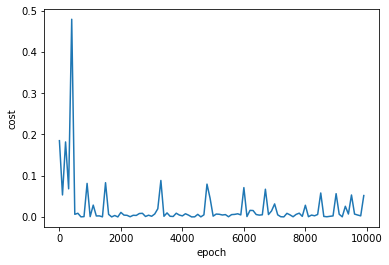

In [80]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

# Mini Batch

In [123]:
scaled_x.shape

(20, 2)

In [153]:
def minibatch_gd(x,y_true, epochs, batch_size, learning_rate= 0.01):
    
    number_of_features = x.shape[1]
    w = np.ones(number_of_features)
    b = 0
    total_samples = x.shape[0]
    
    if batch_size > total_samples:
        batch_size = total_samples
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        rand_index = np.random.permutation(total_samples)
        tmp_x = x[rand_index]
        tmp_y = y_true[rand_index]
        for j in range(0, total_samples, batch_size):
            xj = tmp_x[j:j+batch_size]
            yj = tmp_y[j:j+batch_size]
            y_predicted = np.dot(w,xj.T) + b
            
            w_grad = -(2/total_samples)*(np.dot(xj.T, yj - y_predicted))
            b_grad = -(2/total_samples)*np.sum(yj - y_predicted)
        
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad 
        
            cost = np.mean(np.square(yj - y_predicted))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost, cost_list, epoch_list
w_mini, b_mini, cost_mini, cost_list, epoch_list = minibatch_gd(
    scaled_x, 
    scaled_y.reshape(scaled_y.shape[0],),
    500,
    5
)
    
w_mini, b_mini, cost_mini

(array([0.70712407, 0.67455723]), -0.23035933956759957, 0.005913414240693989)

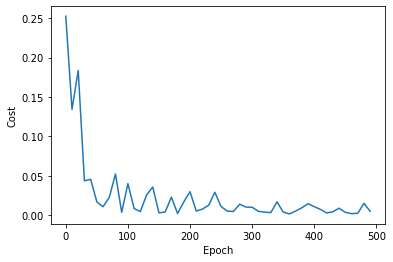

In [154]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list, cost_list)